In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Start by importing the data into python to create a data frame (df) #
df = pd.read_stata('C:/Users/mauri/github/Econometrics-741/741_data_1.dta')

# Let's do exploratory data analysis before we start working with the df.
print(df.shape)  # '(463090, 5) Number of rows, number of columns'.
print(df.info())  # 'Complete summary of data types and entries'
print(df.head(10))  # 'Visualize the first 5 entries of dt'

# Age column data type is in a categorical form thus need to be
# transform to interget format for filter to work.
df = df.astype({'age': 'int32'})
print(df.dtypes)

# Filter data to women who are employed and age between 30 to 39
df2 = df.loc[(df.empstat == 'employed') & (df.age >= 30) & (df.age <= 39)]

print(df2.shape)  # '(14517, 5) Number of rows and columns'

(463090, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 463090 entries, 0 to 463089
Data columns (total 5 columns):
perwt      463090 non-null int16
sex        463090 non-null category
age        463090 non-null category
empstat    463090 non-null category
incwage    463090 non-null int32
dtypes: category(3), int16(1), int32(1)
memory usage: 7.5 MB
None
   perwt     sex age             empstat  incwage
0     20  female  51            employed    30000
1     15  female  37  not in labor force    13000
2     18  female  34  not in labor force     4800
3     38  female  42  not in labor force     6100
4     18  female  51            employed    30000
5     18  female  36  not in labor force     3000
6     30  female  39            employed     6000
7     69  female  53  not in labor force    50000
8     41  female  31  not in labor force     2000
9     58  female  38  not in labor force    29000
perwt         int16
sex        category
age           int32
empstat    category
incwage 

In [6]:
# (a) Find the avergae income of these population set
muinc = df2['incwage'].mean()  # '$48,348.34 average income'
print(f'Average income population set: {muinc}')

Average income population set: 48348.33656770456


In [8]:
# (b) Take a random sample of 1000 women, random state is used to ensure the
# code chooses the same random samples everytime it runs.
df3 = df2.sample(n=1000, random_state=23)
# (i) Sample mean
smu = df3.incwage.mean()  # '$47,355.63 average income sample'
print(f'Average income sample: {smu}')

# (ii) Sample Standard Deviation
sigma = df3.incwage.std()  # '$39,169.62'
print(f'Sample Standard Deviation: {sigma}')

# (iii) Standard Error
SE = sigma/np.sqrt(1000)  # '1238.65'
print(f'Standard Error: {SE}')

# (iv) Give the 95% confidence interval on your estimate of μ.
dgf = 1000-1
alpha = (1-.95)/2  # '0.025'

t = 1.962  # 'From t distribution table'
t = stats.t.ppf(1-0.025, 999)  # 'From stats package which is same as table'

CI95 = SE*t  # '+/- 2427.06661315927'
# Lower end of the range
print(f'Lower end of the range: {(smu-CI95)}')  # '44924.97'

# Upper end of the range
print(f'Upper end of the range: {(smu+CI95)}')  # '49786.29'

# (v) Ho m0 = 50,000 ; H1 m1 =! 50,000
ttest = (smu - 50000)/SE  # '2.13 which is greater than t, thus reject null'
# alpha between 0.025 & 0.01
print(f'T test : {ttest}')
# (vi) Ho m = 55,000 ; H1 m =! 50000
ttest = (smu - 55000)/SE  # '6.17 thus reject Ho and alpha is very small'
print(f'T test: {ttest}')

Average Income sample: 47355.63
Sample Standard Deviation: 39169.62265764469
Standard Error: 1238.65222687495
Lower end of the range: 44924.97137927801
Upper end of the range: 49786.288620721985
T test : -2.134876878776216
T test: -6.171522429089172


In [23]:
# (c) Now  take  10000  random  samples  of  1000  women.
# Record  thesample mean for each sample and save it to a matrix.
xbars = []
for i in range(0, 10001):
    xbar = df2.incwage.sample(n=1000).mean()
    xbars.append(xbar)

arr = np.asarray(xbars)

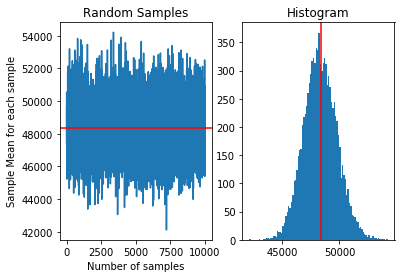

In [57]:

# (i) Produce  a  graph  of  the  distribution  of  these  10,000  samplemeans

# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1,2,1)

plt.plot(arr)
plt.title('Random Samples')
plt.axhline(y=muinc, color='r', linestyle='-')  # 'population set mean'
plt.ylabel('Sample Mean for each sample')
plt.xlabel('Number of samples')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1,2,2)
plt.hist(arr, bins=100)
plt.title('Histogram')
plt.axvline(x=muinc, color='r', linestyle='-')
plt.tight_layout
plt.show()

In [58]:
# (ii) Report the average of these 10,000 sample means.
ave = arr.mean()  # '$48,326.1'
print(ave.round(2))
# (iii) Report the standard deviation of these 10,000 sample means.
sig = arr.std()  # '1463.62'
print(sig.round(2))

48326.1
1463.62


In [65]:
# Chapter 4 See the following definitions of matrices A,B,C,D, and E.
A = np.array([[1,1,5],[1,2,3]])
B = np.array([[1,0],[0,1]])
C = np.array([[3,3], [1,6]])
D = np.array([[5,2,7],[1,9,5],[1,4,5]])
E = np.array([[4,5,6],[3,4,1],[6,7,5]])

# 1 Find the inverse of B
Binv = np.linalg.inv(B)
print(f'Inverse of B: {Binv}')

# 2 Find the inverse of C
Cinv = np.linalg.inv(C)
print(f'Inverse of C: {Cinv}')

# 3 Find A'
AT = A.transpose()
print(f'Tranpose of A: {AT}')

# 4 Find B'
BT = B.transpose()
print(f'Tranpose of B: {BT}')

# 5 Find C'
CT = C.transpose()
print(f'Tranpose of C: {CT}')

# # 6 What is A×C?
# AxC = A.dot(C)
# print(AxC) 
# ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

# 7 What is A'×C?
ATxC = AT.dot(C)
print(f'AT×C: {ATxC}')

# 8 What is B×C?
BxC = B.dot(C)
print( f'BxC: {BxC}')

# 9 What is B+C?
Sum = B + C
print(f'B+C: {Sum}')

# 10 What isD−1?
Dinv = np.linalg.inv(D)
print(f'Invers of D: {Dinv}')

# 11 What is D×E?
DxE = D.dot(E)
print(f'DxE: {DxE}')

Inverse of B: [[1. 0.]
 [0. 1.]]
Inverse of C: [[ 0.4        -0.2       ]
 [-0.06666667  0.2       ]]
Tranpose of A: [[1 1]
 [1 2]
 [5 3]]
Tranpose of B: [[1 0]
 [0 1]]
Tranpose of C: [[3 1]
 [3 6]]
AT×C: [[ 4  9]
 [ 5 15]
 [18 33]]
BxC: [[3 3]
 [1 6]]
B+C: [[4 3]
 [1 7]]
Invers of D: [[ 2.77777778e-01  2.00000000e-01 -5.88888889e-01]
 [-2.00815534e-18  2.00000000e-01 -2.00000000e-01]
 [-5.55555556e-02 -2.00000000e-01  4.77777778e-01]]
DxE: [[68 82 67]
 [61 76 40]
 [46 56 35]]


In [64]:
print(((48348.34-48326.10)/(48348.34))*100)


0.04599951104835857
